<a href="https://colab.research.google.com/github/dheemanthAthreya/6thSem-ML-Lab/blob/main/Lab_4/1BM22CS347_Lab4_Linear_Regression_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Linear Regression

## Canada's per capita income

In [2]:
df = pd.read_csv('canada_per_capita_income.csv')

In [3]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
df.isnull().sum()

,0
year,0
per capita income (US$),0


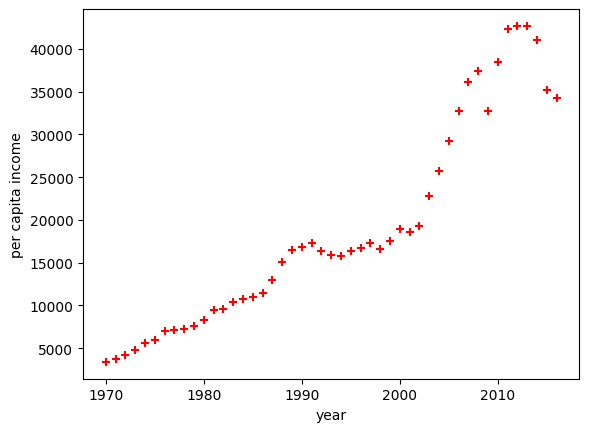

In [6]:
plt.xlabel('year')
plt.ylabel('per capita income')
plt.scatter(df['year'],df['per capita income (US$)'	],color='red',marker='+')

In [86]:
reg = linear_model.LinearRegression()
year = df.drop('per capita income (US$)',axis='columns')
per_capita_income = df['per capita income (US$)'	]
reg.fit(year, per_capita_income)

LinearRegression()

In [87]:
reg.predict([[2020]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [88]:
reg.coef_


array([828.46507522])

In [89]:
reg.intercept_

-1632210.7578554575

## Salary

In [14]:
df_salary = pd.read_csv('salary.csv')

In [19]:
df_salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [18]:
df_salary.isnull().sum()

,0
YearsExperience,2
Salary,0


In [20]:
df_salary['YearsExperience'].fillna(df_salary['YearsExperience'].mean(),inplace=True)

<ipython-input-20-d16ffdc3e204>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_salary['YearsExperience'].fillna(df_salary['YearsExperience'].mean(),inplace=True)


In [21]:
df_salary.isnull().sum()

,0
YearsExperience,0
Salary,0


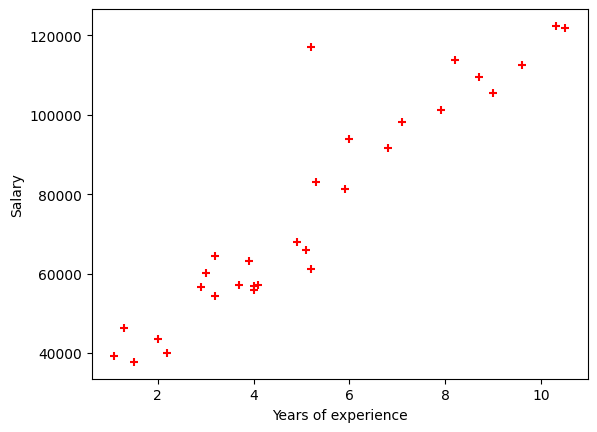

In [22]:
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.scatter(df_salary['YearsExperience'], df_salary['Salary'],color='red',marker='+')

In [23]:
reg = linear_model.LinearRegression()
years_experience = df_salary.drop('Salary',axis='columns')
salary = df_salary['Salary']
reg.fit(years_experience, salary)

LinearRegression()

In [24]:
reg.predict([[12]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139980.88923969])

In [25]:
reg.coef_

array([9398.64060184])

In [26]:
reg.intercept_

27197.2020175696

# Multiple Linear Regression

## Hiring

In [38]:
df_hiring = pd.read_csv('hiring.csv')

In [49]:
df_hiring.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [48]:
df_hiring.isnull().sum()

,0
experience,2
test_score(out of 10),0
interview_score(out of 10),0
salary($),0


In [41]:
df_hiring['test_score(out of 10)'].fillna(df_hiring['test_score(out of 10)'].median(),inplace=True)

<ipython-input-41-1de7cc3fd54d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hiring['test_score(out of 10)'].fillna(df_hiring['test_score(out of 10)'].median(),inplace=True)


In [50]:
#forward fill experience
df_hiring['experience'].bfill(inplace=True)

In [51]:
df_hiring.isnull().sum()

,0
experience,0
test_score(out of 10),0
interview_score(out of 10),0
salary($),0


In [53]:
df_hiring.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,five,8.0,9,50000
1,five,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [56]:
#convert experiece to numerical
from word2number import w2n
df_hiring['experience'] = df_hiring['experience'].apply(w2n.word_to_num)

In [57]:
reg = linear_model.LinearRegression()
reg.fit(df_hiring.drop('salary($)',axis='columns'),df_hiring['salary($)'])

LinearRegression()

In [58]:
reg.coef_

array([3221.39134934, 1617.86554643, 3176.24086827])

In [59]:
reg.intercept_


5918.063888238692

In [60]:

reg.predict([[2, 9, 6]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45979.08171436])

In [61]:
reg.predict([[12, 10, 10]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92515.82422727])

## Companies

In [73]:
df_companies = pd.read_csv('1000_Companies.csv')

In [74]:
df_companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [75]:
df_companies.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [76]:
X = df_companies[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df_companies['Profit']

In [77]:
X = pd.get_dummies(X, columns=['State'], drop_first=True)

In [78]:
reg = linear_model.LinearRegression()
reg.fit(X, y)

LinearRegression()

In [79]:
rd_spend = 91694.48
administration = 515841.3
marketing_spend = 11931.24
state = 'Florida'

In [80]:
input_data = pd.DataFrame({'R&D Spend': [rd_spend],
                           'Administration': [administration],
                           'Marketing Spend': [marketing_spend],
                           'State': [state]})

In [82]:
missing_cols = set(X.columns) - set(input_data.columns)
for col in missing_cols:
    input_data[col] = 0
input_data = input_data[X.columns]

In [83]:
reg.predict(input_data)

array([511017.34614637])

In [84]:
reg.coef_

array([ 5.53149346e-01,  1.02624663e+00,  8.10861610e-02, -4.46353536e+02,
        9.77276094e+01])

In [85]:
reg.intercept_


-70051.24950374496

# Housing Price Linear Regression


In [90]:
df = pd.read_csv('housing_area_price.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


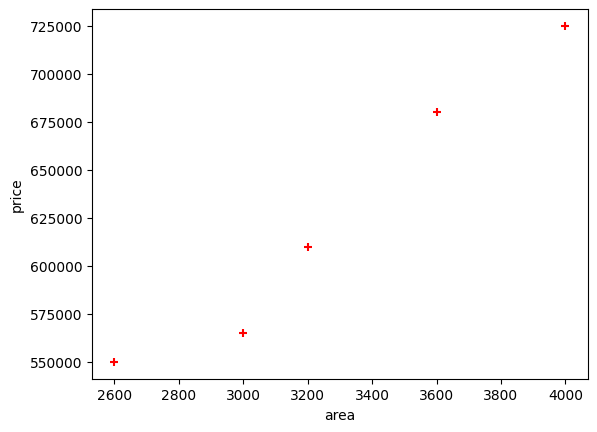

In [91]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [92]:
new_df = df.drop('price',axis='columns')
price = df.price
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [93]:
reg.predict([[3300]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [94]:
reg.coef_

array([135.78767123])

In [95]:
reg.intercept_

180616.43835616432

# Housing Price Multiple REgression


In [96]:
df = pd.read_csv('homeprices_Multiple_LR.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [97]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())

In [98]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [99]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [100]:
reg.intercept_

221323.00186540396

In [101]:
reg.predict([[3000, 3, 40]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])